# Seattle Airbnb Open Data

## Business understanding 

Many people would like to supplement their income by renting their homes on
Airbnb  
Airbnb is an online marketplace that lets people rent out their properties
to guests.  
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.  

We will use this data to determine how one can maximize income from Airbnb
Many people would like to supplement their income by renting their homes on
* If you are looking to buy a property to rent out on the Airbnb platform,
what type of property should you obtain?
* If you are looking to rent out your primary residence only for a certain
the portion of the year which is the best time of the year?
* What amnesties should you provide to ensure that you can fetch a higher price
for your property and gain great review?
* Can machine learning be used to predict price and review scores?

## Data understanding

### A Look at the Data

In order to get a better understanding of the data we will be looking at, let's take a look at some of the characteristics of the dataset.

First, let's read in the data and necessary libraries.

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')
calendar = pd.read_csv('calendar.csv')
pd.set_option('display.max_colwidth', 50)

In [114]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [115]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [116]:
#Provide a set of columns with more than 75% of the values missing
most_missing_cols = set(listings.columns[listings.isnull().mean() > 0.75])
most_missing_cols

{'license', 'square_feet'}

The following colmns have more than 75% of their data misssing:  
* license  
* square_feet

They will be dropped form the dataframe

In [117]:
listings.drop(['license', 'square_feet'], axis=1, inplace=True)

In [118]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [119]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [120]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [121]:
calendar.tail()

,listing_id,date,available,price
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN
1393569,10208623,2017-01-02,f,NaN


In [122]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


## Question 1
Suppose you have an uncle nearing retirement, and they need  a reliable and sustainable source of income.They want to cash in their pension and buy a property in the Seattle area, to rent out on the AirBNB Platform.They want your advice on what type of property they should consider to invest on a  buy to let basis.Which of the following options should they not touch with a ten foot pole?

Apartment          
Bed & Breakfast    
Boat               
Bungalow           
Cabin                   
Camper/RV          
Chalet             
Condominium        
Dorm                    
House              
Loft               
Other              
Tent               
Townhouse          
Treehouse          
Yurt  

### Data preparation

In [123]:
# Convert date to datetime data format
calendar['date'] = calendar['date'].astype('datetime64[D]')

In [124]:
# Additional columns needed for analysis
calendar['Week/Year'] = calendar['date'].apply(lambda x: "%d/%d" % (x.week, x.year))
calendar['Month/Year'] = calendar['date'].apply(lambda x: "%d/%d" % (x.month, x.year))

In [125]:
# Check if new columns are created in the correct format
calendar.head()

,listing_id,date,available,price,Week/Year,Month/Year
0,241032,2016-01-04,t,$85.00,1/2016,1/2016
1,241032,2016-01-05,t,$85.00,1/2016,1/2016
2,241032,2016-01-06,f,NaN,1/2016,1/2016
3,241032,2016-01-07,f,NaN,1/2016,1/2016
4,241032,2016-01-08,f,NaN,1/2016,1/2016


In [126]:
# Create a mask for available listings
availabe_df = calendar[calendar['available'] == 't']
not_availabe_df = calendar[calendar['available'] == 'f']

In [127]:
# count the number of days each listing was available(Standing empty)
availabe_df['listing_id'].value_counts()

11012       365
2926776     365
1594412     365
4669377     365
4993710     365
           ... 
9868607       1
9714078       1
10210625      1
3819831       1
10235136      1
Name: listing_id, Length: 3723, dtype: int64

In [128]:
# Filter for listings which were empty for the whole year
df1 = availabe_df[availabe_df.groupby("listing_id")['listing_id'].transform('size') > 364]

In [129]:
# Create pandas list
id_list = df1['listing_id'].tolist()

In [130]:
# Create new dataframe containing only listings which were not booked for the whole year
new_df =  listings[listings['id'].isin(id_list)]

In [131]:
# Counts for each property type in the new dataframe
new_df.property_type.value_counts()

House              340
Apartment          256
Townhouse           29
Condominium         17
Bed & Breakfast     14
Loft                 5
Camper/RV            4
Other                4
Boat                 4
Bungalow             2
Treehouse            1
Chalet               1
Tent                 1
Name: property_type, dtype: int64

In [132]:
# Counts for each property type in the original dataframe
listings.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

### Evaluate the Results

In [133]:
# Use proportion to cater for propety types with more listings to begin with
property_type = new_df.property_type.value_counts()/listings.property_type.value_counts()

In [134]:
property_type

Apartment          0.149883
Bed & Breakfast    0.378378
Boat               0.500000
Bungalow           0.153846
Cabin                   NaN
Camper/RV          0.307692
Chalet             0.500000
Condominium        0.186813
Dorm                    NaN
House              0.196192
Loft               0.125000
Other              0.181818
Tent               0.200000
Townhouse          0.245763
Treehouse          0.333333
Yurt                    NaN
Name: property_type, dtype: float64

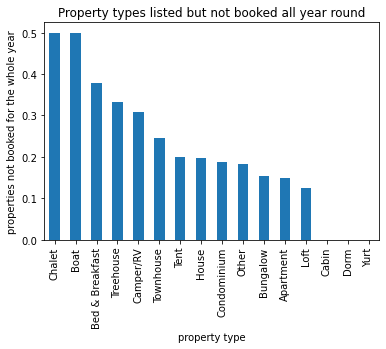

In [135]:
property_type.sort_values(ascending=False).plot(kind="bar")
plt.title("Property types listed but not booked all year round")
plt.xlabel('property type')
plt.ylabel('properties not booked for the whole year');

About 50% of chalets and boats are not booked all year round.These types of properties should be avoided at all costs.

More than 30% of Bed & Breakfast,Campers and Treehouse are not booked all year long.These types of properties should be avoided as well

Lofts are least likely to go the whole year without a booking.The uncle should invest in a Loft or apartment.

## Question 2
If you wanted to make some extra income by staying with friends and relatives, while renting out your primary residence on AirBNb, which is best time of the year to do it.

### Data preparation 

In [136]:
# Filter by bookings per week
weekly_bookings = not_availabe_df['Week/Year'].value_counts()

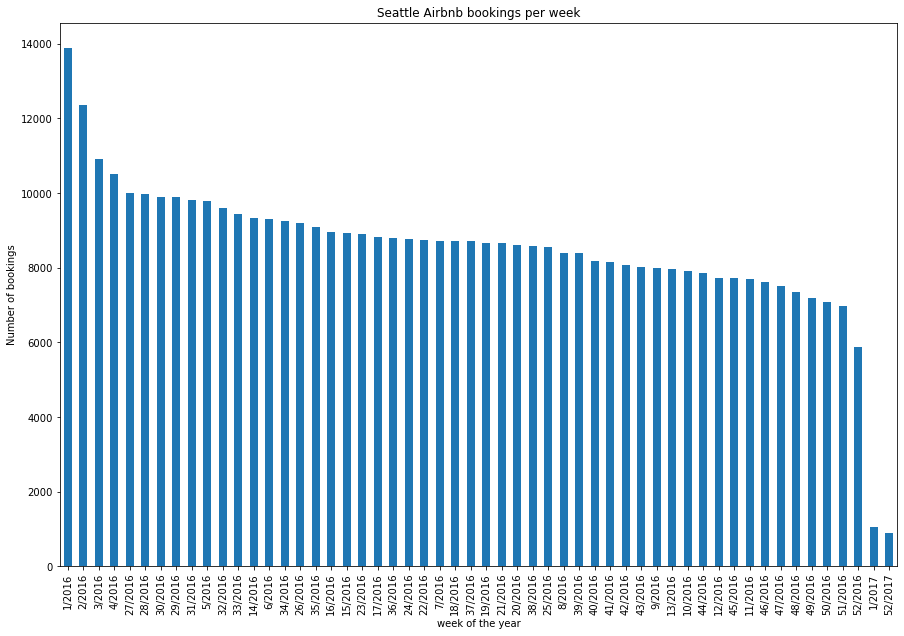

In [137]:
weekly_bookings.plot(kind="bar",figsize=(15,10))
plt.title("Seattle Airbnb bookings per week")
plt.xlabel('week of the year')
plt.ylabel('Number of bookings');

In [138]:
# Filter by bookings per month
monthly_bookings = not_availabe_df['Month/Year'].value_counts()

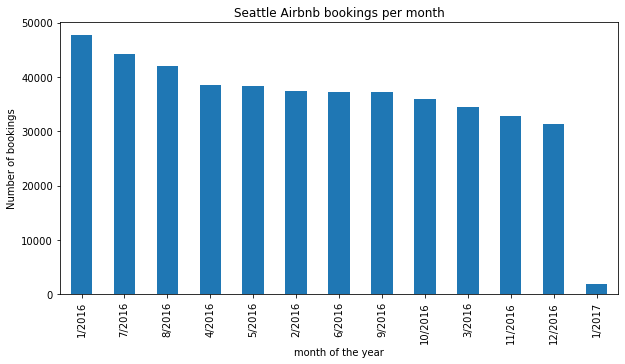

In [139]:
monthly_bookings.sort_values(ascending=False).plot(kind="bar",figsize=(10,5))
plt.title("Seattle Airbnb bookings per month")
plt.xlabel('month of the year')
plt.ylabel('Number of bookings');

### Evaluate the Results

To maximize income form your side hustle, you should rent out your house for 4 weeks in January and July

## Question 3
How can we predict the price that can be charged to rent a room on the AirBNB platform?

### Data preparation 

In [140]:
#Remove columns that are not needed
df = listings.drop(['listing_url','scrape_id','last_scraped','name','summary','space','description','experiences_offered',
                    'neighborhood_overview','notes','transit','thumbnail_url','medium_url','picture_url','xl_picture_url',
                    'host_id','host_url','host_name','host_location','host_about','host_thumbnail_url','host_picture_url',
                    'host_neighbourhood','host_listings_count','street','neighbourhood','neighbourhood_cleansed',
                    'neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country'
                    ,'latitude','longitude','weekly_price','monthly_price','has_availability','availability_30','availability_60'
                    ,'availability_90','availability_365','calendar_last_scraped','requires_license',
                    'jurisdiction_names'], axis=1)

In [141]:
# Convert price column from string to float data type
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')
df['price'] = df['price'].astype(float)
df['price_per_person'] = df.price/df.accommodates
df.drop(['price', 'accommodates'], axis=1,inplace = True)

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   host_since                        3816 non-null   object 
 2   host_response_time                3295 non-null   object 
 3   host_response_rate                3295 non-null   object 
 4   host_acceptance_rate              3045 non-null   object 
 5   host_is_superhost                 3816 non-null   object 
 6   host_total_listings_count         3816 non-null   float64
 7   host_verifications                3818 non-null   object 
 8   host_has_profile_pic              3816 non-null   object 
 9   host_identity_verified            3816 non-null   object 
 10  is_location_exact                 3818 non-null   object 
 11  property_type                     3817 non-null   object 
 12  room_t

In [143]:
df.describe()

,id,host_total_listings_count,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,price_per_person
count,3.818000e+03,3816.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000,3818.000000
mean,5.550111e+06,7.157757,1.259469,1.307712,1.735394,1.672603,2.369303,780.447617,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919,41.266923
std,2.962660e+06,28.628149,0.590369,0.883395,1.139480,1.311040,16.305902,1683.589007,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348,20.676221
min,3.335000e+03,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000,4.750000
25%,3.258256e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000,27.500000
50%,6.118244e+06,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000,37.500000
75%,8.035127e+06,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000,50.000000
max,1.034016e+07,502.000000,8.000000,7.000000,15.000000,15.000000,1000.000000,100000.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000,275.000000


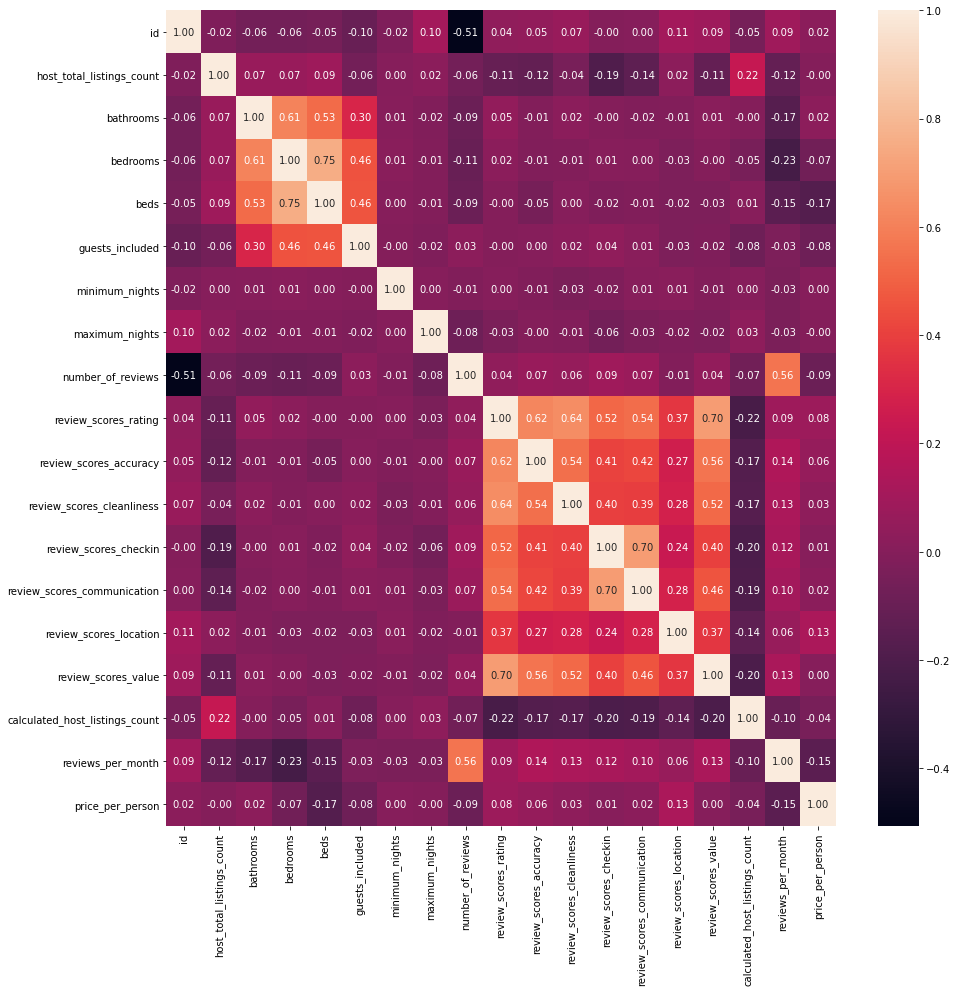

In [144]:
fig, ax = plt.subplots(figsize=(15,15))   
sns.heatmap(df.corr(), annot=True, fmt=".2f",ax=ax);

It appears that none of our variables appear to greatly correlated with price

In [145]:
# Create list of numeric variables
num_vars = df.select_dtypes(include=['float', 'int']).columns
num_list = num_vars.tolist()
num_list

['host_total_listings_count',
 'bathrooms',
 'bedrooms',
 'beds',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'reviews_per_month',
 'price_per_person']

### Data Modelling

In [146]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['host_total_listings_count','bathrooms','bedrooms','beds','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
'review_scores_location','review_scores_value','reviews_per_month','price_per_person']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['price_per_person'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['host_total_listings_count','bathrooms','bedrooms','beds','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
'review_scores_location','review_scores_value','reviews_per_month']]
y = fill_df['price_per_person']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.07665287636347351 on 1146 values.'

In [147]:
cat_df = df.select_dtypes(include=['object']) # Subset to a dataframe only holding the categorical columns

# Print how many categorical columns are in the dataframe - should be 147
cat_df.shape[1]

23

In [148]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df  

In [149]:

#Pull a list of the column names of the categorical variables
cat_df = df.select_dtypes(include=['object'])
cat_cols_lst = cat_df.columns

df_new = create_dummy_df(df, cat_cols_lst, dummy_na=False)
#Use your newly created function

# Show a header of df_new to check
print(df_new.shape)

(3818, 6416)


In [150]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'price_per_person', cat_cols_lst, dummy_na=False)

In [151]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.9999681873455971.  The rsquared on the test data was -2.5561181978224925e+22.


In [152]:
pd.set_option('display.max_colwidth', None)

In [153]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['price_per_person'], axis=0)
    y = df['price_per_person']
    
    #Drop respondent and expected salary columns
    df = df.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

## Evaluation

In [154]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
444,host_since_2012-10-12,6.934254e+13,6.934254e+13
1544,"host_verifications_['google', 'jumio']",-5.475982e+13,5.475982e+13
851,host_since_2014-04-28,-3.727049e+13,3.727049e+13
1606,"amenities_{""Cable TV"",""Wireless Internet"",""Air Conditioning"",Pool,Kitchen,""Free Parking on Premises"",Gym,""Elevator in Building"",""Hot Tub"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials}",3.512084e+13,3.512084e+13
4852,"amenities_{TV,Kitchen,""Free Parking on Premises"",""Elevator in Building"",Heating,Washer,Dryer,""Smoke Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",3.089918e+13,3.089918e+13
5519,first_review_2014-03-10,-3.066558e+13,3.066558e+13
3963,"amenities_{TV,""Wireless Internet"",Kitchen,Gym,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,Shampoo}",-3.066558e+13,3.066558e+13
2623,"amenities_{Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),""Elevator in Building"",""Indoor Fireplace"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,Essentials,Shampoo}",2.471830e+13,2.471830e+13
5791,first_review_2015-02-21,-2.121571e+13,2.121571e+13
3978,"amenities_{TV,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Fire Extinguisher"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace""}",1.842344e+13,1.842344e+13


A property with the following amenities is one of the gretest indicators of price:

"Cable TV","Wireless Internet","Air Conditioning",Pool,Kitchen,"Free Parking on Premises",Gym,"Elevator in Building","Hot Tub",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials}

### Question 4
How can we predict the review scores that listings get on the AirBNB platform?

### Data Preparation  and Modelling

In [155]:
#Only use quant variables and drop any rows with missing values
num_vars = df[['host_total_listings_count','bathrooms','bedrooms','beds','review_scores_rating',
 'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication',
'review_scores_location','review_scores_value','reviews_per_month','price_per_person']]

#Drop the rows with missing salaries
drop_sal_df = num_vars.dropna(subset=['review_scores_value'], axis=0)

# Mean function
fill_mean = lambda col: col.fillna(col.mean())
# Fill the mean
fill_df = drop_sal_df.apply(fill_mean, axis=0)

#Split into explanatory and response variables
X = fill_df[['host_total_listings_count','bathrooms','bedrooms','beds','reviews_per_month']]
y = fill_df['review_scores_value']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only quantitative variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only quantitative variables was 0.04492480149539879 on 949 values.'

In [156]:
def clean_fit_linear_mod(df, response_col, cat_cols, dummy_na, test_size=.3, rand_state=42):
    '''
    INPUT:
    df - a dataframe holding all the variables of interest
    response_col - a string holding the name of the column 
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    test_size - a float between [0,1] about what proportion of data should be in the test dataset
    rand_state - an int that is provided as the random state for splitting the data into training and test 
    
    OUTPUT:
    test_score - float - r2 score on the test data
    train_score - float - r2 score on the test data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    
    Your function should:
    1. Drop the rows with missing response values
    2. Drop columns with NaN for all the values
    3. Use create_dummy_df to dummy categorical columns
    4. Fill the mean of the column for any missing values 
    5. Split your data into an X matrix and a response vector y
    6. Create training and test sets of data
    7. Instantiate a LinearRegression model with normalized data
    8. Fit your model to the training data
    9. Predict the response for the training data and the test data
    10. Obtain an rsquared value for both the training and test data
    '''
    #Drop the rows with missing response values
    df  = df.dropna(subset=[response_col], axis=0)

    #Drop columns with all NaN values
    df = df.dropna(how='all', axis=1)

    #Dummy categorical variables
    df = create_dummy_df(df, cat_cols, dummy_na)

    # Mean function
    fill_mean = lambda col: col.fillna(col.mean())
    # Fill the mean
    df = df.apply(fill_mean, axis=0)

    #Split into explanatory and response variables
    X = df.drop(response_col, axis=1)
    y = df[response_col]

    #Split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=rand_state)

    lm_model = LinearRegression(normalize=True) # Instantiate
    lm_model.fit(X_train, y_train) #Fit

    #Predict using your model
    y_test_preds = lm_model.predict(X_test)
    y_train_preds = lm_model.predict(X_train)

    #Score using your model
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)

    return test_score, train_score, lm_model, X_train, X_test, y_train, y_test


#Test your function with the above dataset
test_score, train_score, lm_model, X_train, X_test, y_train, y_test = clean_fit_linear_mod(df_new, 'review_scores_value', cat_cols_lst, dummy_na=False)

In [157]:
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 1.0.  The rsquared on the test data was 0.25298458534764456.


## Evaluate the Results

In [158]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['review_scores_value'], axis=0)
    y = df['review_scores_value']
    
    #Drop respondent and expected salary columns
    df = df.drop(['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                  'review_scores_communication','review_scores_location'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    

In [159]:
def coef_weights2(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df2 = coef_weights2(lm_model.coef_, X_train)

#A quick look at the top results
coef_df2.head(20)

,est_int,coefs,abs_coefs
2521,"amenities_{Internet,""Wireless Internet"",Kitchen,Gym,""Elevator in Building"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,""Smoke Detector"",Shampoo,Hangers,""Hair Dryer"",Iron}",-2.735998,2.735998
3981,"amenities_{TV,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",-2.233443,2.233443
3210,"amenities_{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,Washer,Dryer,""Smoke Detector"",""Fire Extinguisher"",Essentials,Shampoo}",-1.933341,1.933341
5992,first_review_2015-09-24,1.568196,1.568196
1870,"amenities_{""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Cat(s),Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",1.523900,1.523900
3019,"amenities_{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Smoking Allowed"",""Pets Allowed"",""Pets live on this property"",Dog(s),""Elevator in Building"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo,""24-Hour Check-in"",Hangers,""Hair Dryer"",Iron,""Laptop Friendly Workspace""}",-1.523686,1.523686
3776,"amenities_{TV,""Wireless Internet"",""Free Parking on Premises"",""Hot Tub"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",-1.493023,1.493023
571,host_since_2013-04-26,-1.453356,1.453356
4713,"amenities_{TV,Internet,""Wireless Internet"",Kitchen,""Pets live on this property"",Dog(s),Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",1.408899,1.408899
3534,"amenities_{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",Heating,Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",Essentials}",-1.405674,1.405674


A property with the following amenities is one of the gretest indicators of reciving  a great reviews:

Internet,"Wireless Internet",Kitchen,Gym,"Elevator in Building","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector",Shampoo,Hangers,"Hair Dryer",Iron

## Deployment

The main findings of the code can be found at the post available [here](https://fmakayi.github.io/).